Training RandomForest...
Training AdaBoost...
Training NGBoost...


d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training CatBoost...
Training XGBoost...

模型评估结果：
              Train R²   Test R²  Train RMSE  Test RMSE  Train MAE  Test MAE
RandomForest  0.882720  0.914356   10.309177   8.800043   3.867016  3.559156
AdaBoost      0.881435  0.949805   10.365497   6.736990   3.628704  2.545791
NGBoost       0.930317  0.980862    7.946470   4.159949   2.156234  1.859469
CatBoost      0.940898  0.993585    7.318360   2.408444   1.454490  1.311411
XGBoost       0.940976  0.993863    7.313534   2.355666   1.318374  1.119716


<Figure size 800x600 with 0 Axes>

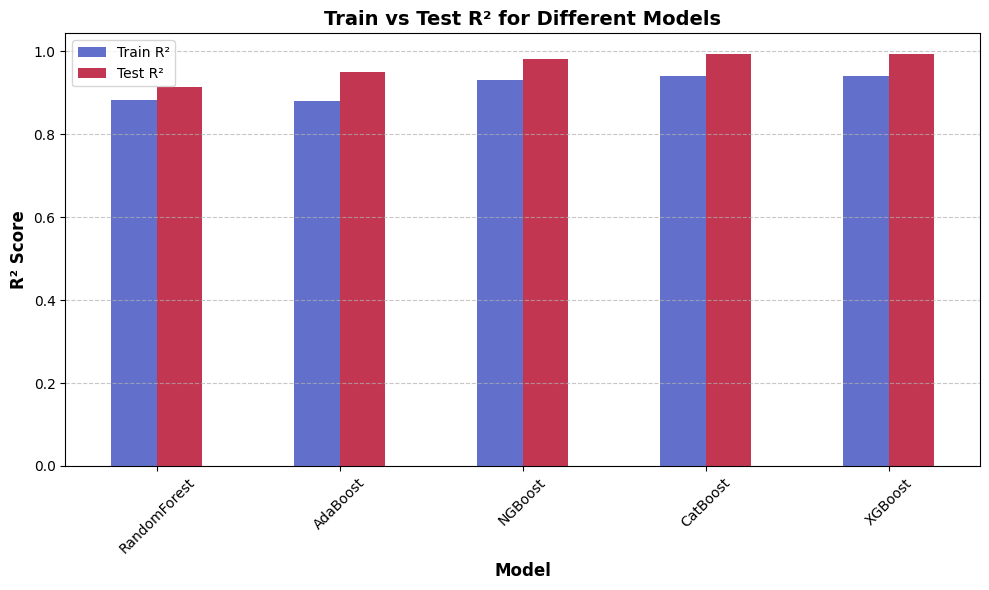

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from ngboost import NGBRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# **1. 读取数据**
df = pd.read_excel(r'E:\Desktop\论文\昊昊数据预测\昊昊师兄\吸附砷数据.xlsx')

# **2. 划分特征和标签**
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# **3. 数据标准化（归一化）**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **4. 数据集划分**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **5. 定义所有模型**
models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=2, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.2, random_state=42),
    "NGBoost": NGBRegressor(n_estimators=150, learning_rate=0.5, random_state=42, verbose=0),
    "CatBoost": CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, silent=True, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, objective='reg:squarederror', random_state=42)
}

# **6. 训练 & 评估每个模型**
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # 计算评估指标
    results[name] = {
        "Train R²": r2_score(y_train, y_pred_train),
        "Test R²": r2_score(y_test, y_pred_test),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test)
    }

# **7. 转换结果为 DataFrame**
results_df = pd.DataFrame(results).T
print("\n模型评估结果：")
print(results_df)

# **8. 保存评估结果**
results_df.to_csv('individual_model_results.csv')

# **9. 可视化：R² 对比**
plt.figure(figsize=(8, 6))
results_df[['Train R²', 'Test R²']].plot(kind='bar', figsize=(10, 6), colormap='coolwarm', alpha=0.8)
plt.title("Train vs Test R² for Different Models", fontsize=14, fontweight="bold")
plt.xlabel("Model", fontsize=12, fontweight="bold")
plt.ylabel("R² Score", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc="upper left", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_r2_comparison.pdf', format='pdf')
plt.show()


In [5]:
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os
import joblib
# **1. 读取数据**
df = pd.read_excel(r'E:\Desktop\论文\昊昊数据预测\昊昊师兄\吸附砷数据.xlsx')

# **2. 划分特征和标签**
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# **3. 数据标准化**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **4. 数据集划分**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **5. 定义基模型**
models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=2, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.2, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, silent=True, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, objective='reg:squarederror', random_state=42),
    "NGBoost": NGBRegressor(n_estimators=150, learning_rate=0.5, random_state=42, verbose=0)
}

# **6. 训练每个基模型**
train_preds = []
test_preds = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_preds.append(y_train_pred.reshape(-1, 1))
    test_preds.append(y_test_pred.reshape(-1, 1))

    print(f"{name} - Train R²: {r2_score(y_train, y_train_pred):.4f}, Test R²: {r2_score(y_test, y_test_pred):.4f}")

# **7. 生成 Stacking 训练数据**
X_train_meta = np.hstack(train_preds)
X_test_meta = np.hstack(test_preds)

# **8. 训练元模型**
meta_model = Ridge(alpha=1.0)
meta_model.fit(X_train_meta, y_train)
save_path = "E:\Desktop\20250320平台"
os.makedirs(save_path, exist_ok=True)  # 确保目录存在
# **9. 保存所有模型**
joblib.dump(models, 'E:/Desktop/20250320平台/平台/base_models.pkl')
joblib.dump(meta_model, 'E:/Desktop/20250320平台/平台/meta_model.pkl')
joblib.dump(scaler, 'E:/Desktop/20250320平台/平台/scaler.pkl')

print("✅ 所有模型已成功保存！")


Training RandomForest...
RandomForest - Train R²: 0.8827, Test R²: 0.9144
Training AdaBoost...
AdaBoost - Train R²: 0.8814, Test R²: 0.9498
Training CatBoost...
CatBoost - Train R²: 0.9409, Test R²: 0.9936
Training XGBoost...
XGBoost - Train R²: 0.9410, Test R²: 0.9939
Training NGBoost...


d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


NGBoost - Train R²: 0.9303, Test R²: 0.9809
✅ 所有模型已成功保存！


In [4]:
import joblib

# 保存基模型
joblib.dump(models, "base_models.pkl")

# 保存元模型
joblib.dump(meta_model, "meta_model.pkl")

# 保存数据标准化器
joblib.dump(scaler, "scaler.pkl")

print("Models saved successfully!")


Models saved successfully!


In [4]:
import os
print(os.path.exists("base_models.pkl"))
print(os.path.exists("meta_model.pkl"))
print(os.path.exists("scaler.pkl"))


True
True
True


In [ ]:
import pandas as pd
import numpy as np
import joblib  # 用于保存和加载模型
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# **1. 读取数据**
df = pd.read_excel(r'E:\Desktop\论文\昊昊数据预测\昊昊师兄\吸附砷数据.xlsx')

# **2. 划分特征和标签**
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# **3. 数据标准化**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **4. 数据集划分**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **5. 定义基模型**
models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=2, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.2, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, silent=True, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, objective='reg:squarederror', random_state=42),
    "NGBoost": NGBRegressor(n_estimators=150, learning_rate=0.5, random_state=42, verbose=0)
}

# **6. 训练每个模型 & 计算预测值**
train_preds = []
test_preds = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_preds.append(y_train_pred.reshape(-1, 1))
    test_preds.append(y_test_pred.reshape(-1, 1))

    print(f"{name} - Train R²: {r2_score(y_train, y_train_pred):.4f}, Test R²: {r2_score(y_test, y_test_pred):.4f}")

# **7. 将基学习器的预测结果作为元学习器的输入**
X_train_meta = np.hstack(train_preds)
X_test_meta = np.hstack(test_preds)

# **8. 训练元学习器**
meta_model = Ridge(alpha=1.0)
meta_model.fit(X_train_meta, y_train)

# **9. Stacking 预测**
y_pred_train_stacking = meta_model.predict(X_train_meta)
y_pred_test_stacking = meta_model.predict(X_test_meta)

# **10. 计算评估指标**
stacking_results = {
    "Train R²": r2_score(y_train, y_pred_train_stacking),
    "Test R²": r2_score(y_test, y_pred_test_stacking),
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train_stacking)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test_stacking)),
    "Train MAE": mean_absolute_error(y_train, y_pred_train_stacking),
    "Test MAE": mean_absolute_error(y_test, y_pred_test_stacking),
    "Train EV": explained_variance_score(y_train, y_pred_train_stacking),
    "Test EV": explained_variance_score(y_test, y_pred_test_stacking)
}

# **11. 输出评估结果**
stacking_results_df = pd.DataFrame(stacking_results, index=['Stacking Model'])
print("\nStacking Model Evaluation:")
print(stacking_results_df)

# **12. 保存评估结果**
stacking_results_df.to_csv('stacking_model_results.csv')

# **13. 保存模型**
joblib.dump(models, 'base_models.pkl')  # 保存所有基模型
joblib.dump(meta_model, 'stacking_meta_model.pkl')  # 保存堆叠法元模型
joblib.dump(scaler, 'scaler.pkl')  # 保存标准化器（用于后续推理）

print("所有模型已成功保存！")


Training RandomForest...
RandomForest - Train R²: 0.8827, Test R²: 0.9144
Training AdaBoost...
AdaBoost - Train R²: 0.8814, Test R²: 0.9498
Training CatBoost...
CatBoost - Train R²: 0.9409, Test R²: 0.9936
Training XGBoost...
XGBoost - Train R²: 0.9410, Test R²: 0.9939
Training NGBoost...


d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\ANACONDA\envs\20250129\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


NGBoost - Train R²: 0.9303, Test R²: 0.9809

Stacking Model Evaluation:
                Train R²  Test R²  Train RMSE  Test RMSE  Train MAE  Test MAE  \
Stacking Model  0.940974  0.99408    7.313666    2.31362   1.345708  1.143102   

                Train EV   Test EV  
Stacking Model  0.940974  0.994115  
所有模型已成功保存！


Training RF...
Training XGB...
Training AdaBoost...


100%|██████████| 16/16 [00:01<00:00, 11.65it/s]


Training CatBoost...


C:\Users\hp\AppData\Local\Temp\ipykernel_17912\314048317.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=np.array(X.columns)[sorted_idx], palette="coolwarm")
C:\Users\hp\AppData\Local\Temp\ipykernel_17912\314048317.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=np.array(X.columns)[sorted_idx], palette="coolwarm")
C:\Users\hp\AppData\Local\Temp\ipykernel_17912\314048317.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=np.array(X.columns)[sorted_

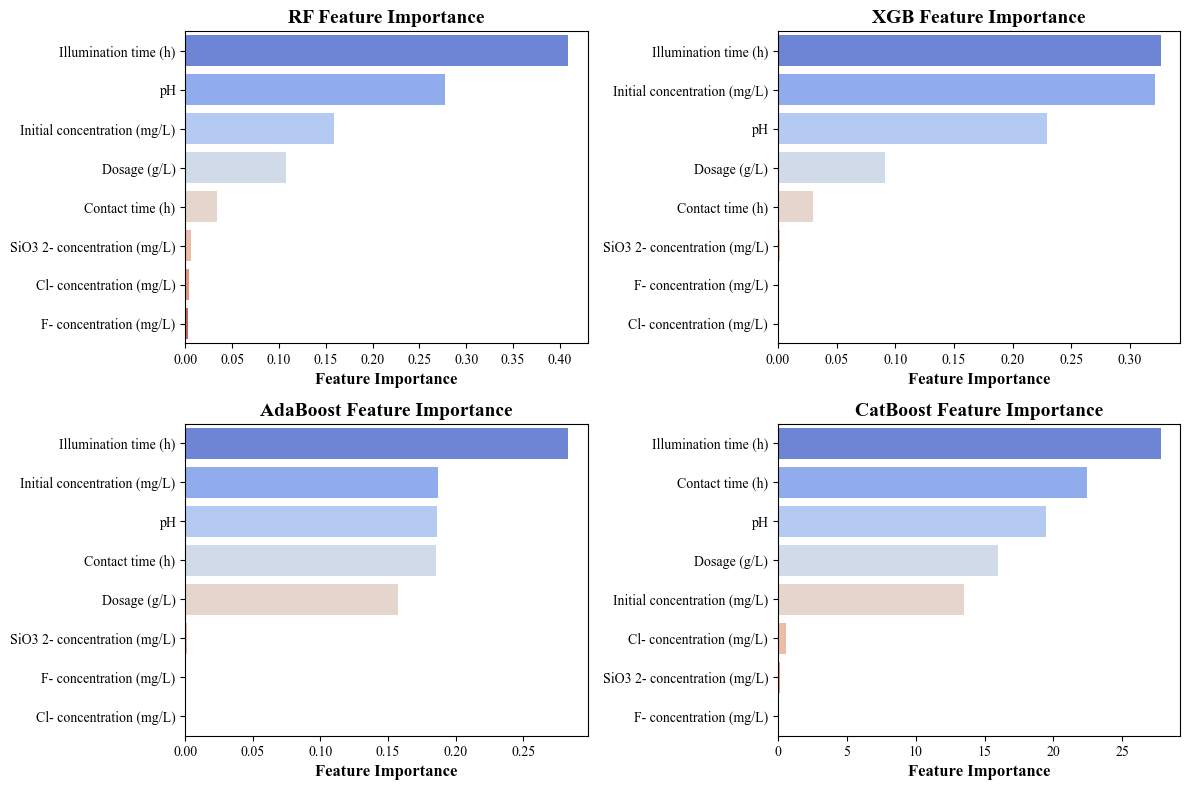

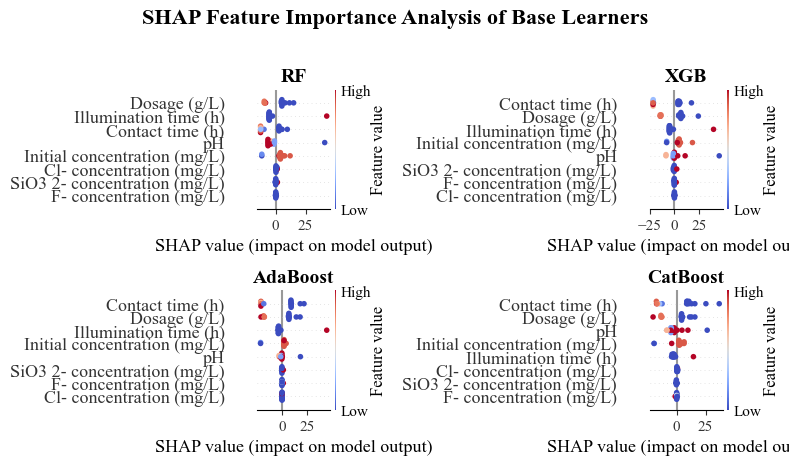

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.family'] = 'Times New Roman'
# **1. 读取数据**
df = pd.read_excel(r'E:\Desktop\论文\昊昊数据预测\昊昊师兄\吸附砷数据.xlsx')

# **2. 划分特征和标签**
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# **3. 数据标准化**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **4. 数据集划分**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **5. 定义基模型**
models = {
    "RF": RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=2, random_state=42),
    "XGB": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, objective='reg:squarederror', random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.2, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, silent=True, random_state=42),
}

# **6. 计算特征重要性和 SHAP**
feature_importance_dict = {}
shap_values_dict = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # **计算特征重要性**
    if hasattr(model, "feature_importances_"):
        feature_importance_dict[name] = model.feature_importances_
    
    # **计算 SHAP 值**
    try:
        if name == "AdaBoost":
            explainer = shap.KernelExplainer(model.predict, X_train[:50])  # 只取部分样本加速计算
            shap_values = explainer.shap_values(X_test[:50])  # 计算部分样本 SHAP 值
        else:
            explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
            shap_values = explainer.shap_values(X_test)

        shap_values_dict[name] = shap_values
    except Exception as e:
        print(f"SHAP 计算失败: {name}, 错误信息: {e}")

# **7. 画特征重要性**
plt.figure(figsize=(12, 8))
for i, (name, importance) in enumerate(feature_importance_dict.items()):
    plt.subplot(2, 2, i+1)
    sorted_idx = np.argsort(importance)[::-1]
    sns.barplot(x=importance[sorted_idx], y=np.array(X.columns)[sorted_idx], palette="coolwarm")
    plt.title(f"{name} Feature Importance", fontsize=14, fontweight="bold")
    plt.xlabel("Feature Importance", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

# **8. 画 SHAP Summary 图**
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle("SHAP Feature Importance Analysis of Base Learners", fontsize=16, fontweight="bold")

for ax, (name, shap_values) in zip(axes.flat, shap_values_dict.items()):
    plt.sca(ax)
    shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist(), show=False, cmap="coolwarm")
    ax.set_title(name, fontsize=14, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
